In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
training_set = pd.read_csv(r'C:\Users\Beyrylle\Downloads\Compressed\C42-ML-Classification-Package\ML Classification Package\3. Logisitic Regression\Train_Titanic.csv')

In [4]:
training_set.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
survived = training_set[training_set['Survived']==1]
no_survived =  training_set[training_set['Survived']==0]

In [6]:
print('total = ',len(training_set))

total =  891


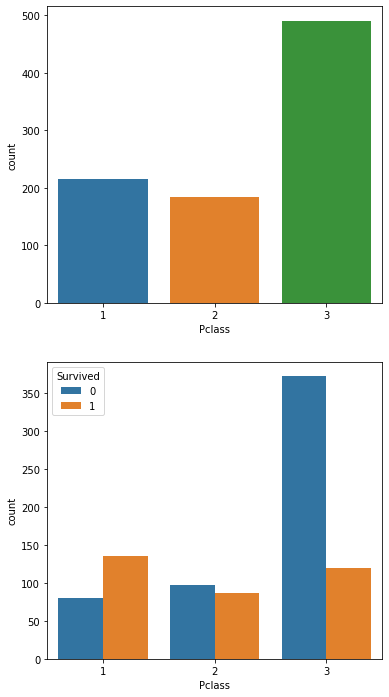

In [7]:
plt.figure(figsize =[6,12])
plt.subplot(211)
sns.countplot(x ='Pclass',data = training_set)
plt.subplot(212)


sns.countplot(x ='Pclass',hue = 'Survived' ,data = training_set)

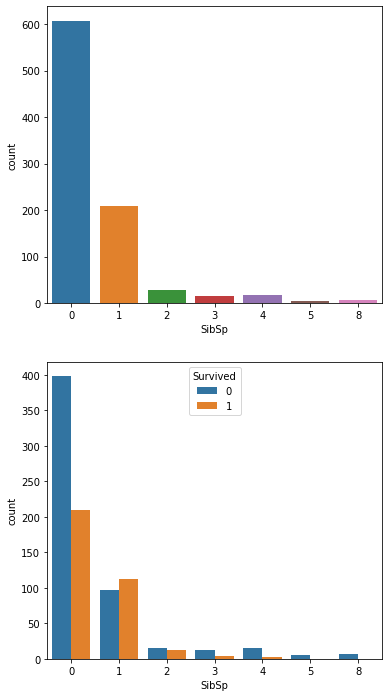

In [8]:
plt.figure(figsize =[6,12])
plt.subplot(211)
sns.countplot(x ='SibSp',data = training_set)
plt.subplot(212)


sns.countplot(x ='SibSp',hue = 'Survived' ,data = training_set)

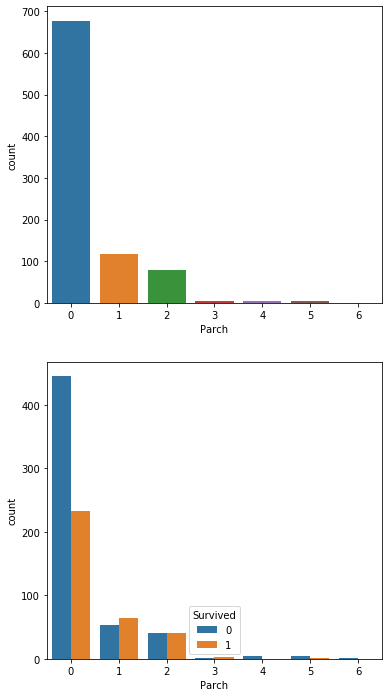

In [9]:
plt.figure(figsize =[6,12])
plt.subplot(211)
sns.countplot(x ='Parch',data = training_set)
plt.subplot(212)


sns.countplot(x ='Parch',hue = 'Survived' ,data = training_set)

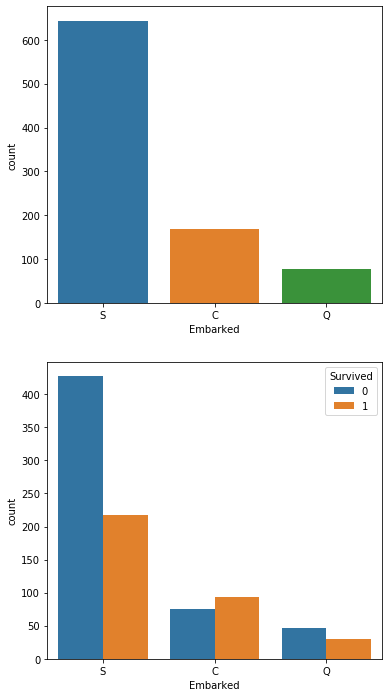

In [10]:
plt.figure(figsize =[6,12])
plt.subplot(211)
sns.countplot(x ='Embarked',data = training_set)
plt.subplot(212)


sns.countplot(x ='Embarked',hue = 'Survived' ,data = training_set)

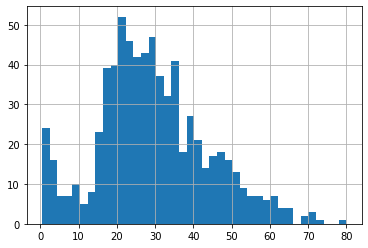

In [11]:
training_set['Age'].hist(bins = 40)

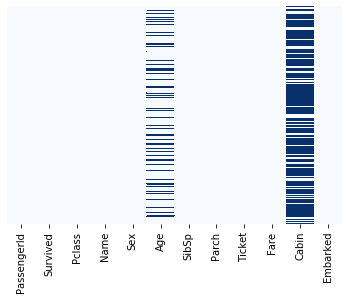

In [12]:
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [13]:
training_set.drop('Cabin',axis = 1,inplace = True)

In [14]:
training_set.drop(['Name','Ticket'], axis =1 ,inplace =True)

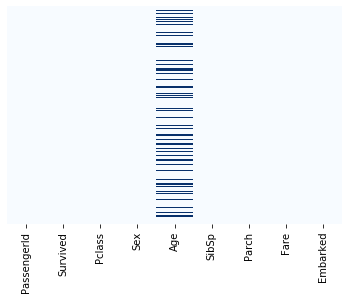

In [15]:
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

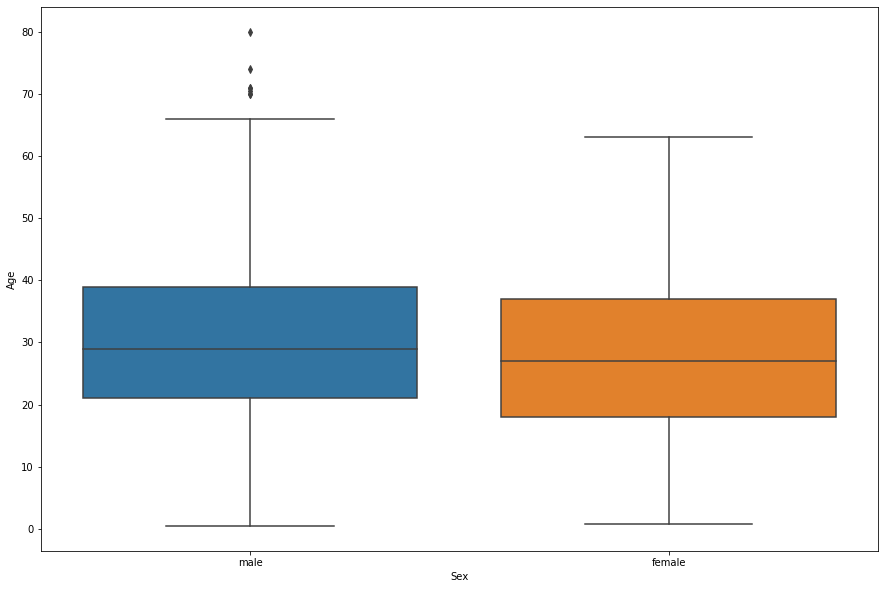

In [16]:
plt.figure(figsize = (15,10))
sns.boxplot(x='Sex',y='Age',data = training_set)

In [17]:
def Fill_Age(data):
    age = data[0]
    sex = data[1]
    
    if pd.isnull(age):
        if sex is 'male':
            return 29
        else:
            return 25
    else:
            return age

In [18]:
training_set['Age'] = training_set[['Age','Sex']].apply(Fill_Age,axis =1)

In [19]:
male =pd.get_dummies(training_set['Sex'],drop_first = True)

In [20]:
male


,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [21]:
   training_set.drop(['Sex'], axis =1, inplace = True)

In [22]:
training_set =pd.concat([training_set,male],axis =1)

In [23]:
training_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,1,0,3,22.0,1,0,7.2500,S,1
1,2,1,1,38.0,1,0,71.2833,C,0
2,3,1,3,26.0,0,0,7.9250,S,0
3,4,1,1,35.0,1,0,53.1000,S,0
4,5,0,3,35.0,0,0,8.0500,S,1
5,6,0,3,25.0,0,0,8.4583,Q,1
6,7,0,1,54.0,0,0,51.8625,S,1
7,8,0,3,2.0,3,1,21.0750,S,1
8,9,1,3,27.0,0,2,11.1333,S,0
9,10,1,2,14.0,1,0,30.0708,C,0


In [24]:
x = training_set.drop('Survived',axis =1).values

In [25]:
x


array([[1, 3, 22.0, ..., 7.25, 'S', 1],
       [2, 1, 38.0, ..., 71.2833, 'C', 0],
       [3, 3, 26.0, ..., 7.925, 'S', 0],
       ...,
       [889, 3, 25.0, ..., 23.45, 'S', 0],
       [890, 1, 26.0, ..., 30.0, 'C', 1],
       [891, 3, 32.0, ..., 7.75, 'Q', 1]], dtype=object)

In [26]:
y = training_set['Survived'].values

In [27]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [28]:
#model traininh
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.2, random_state =10)

In [29]:
from sklearn.linear_model import LogisticRegression
x = x.apply(pd.to_numeric,errors = 'coerce')
y = y.apply(pd.to_numeric,errors = 'coerce')
classifier =LogisticRegression(random_state =0)
classifier.fit(x_train,y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [ ]:
y_predict = classifier.predict(x_test)

In [ ]:
y_predict

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrics(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt = 'd')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))